In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
soal = pd.read_csv(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\Dataset Soal C4-C6 preprocessed.csv")
soal.head()

,Soal Pertanyaan,Label,Casefold,Tokenize,FreqDist,Stopwords,Stemmed
0,ASEAN merupakan organisasi regional Asia Tengg...,C4,asean merupakan organisasi regional asia tengg...,"['asean', 'merupakan', 'organisasi', 'regional...",<FreqDist with 21 samples and 22 outcomes>,"['asean', 'organisasi', 'regional', 'asia', 't...","['asean', 'organisasi', 'regional', 'asia', 't..."
1,Gerakan Non Blok merupakan organisasi negara-n...,C4,gerakan non blok merupakan organisasi negara-n...,"['gerakan', 'non', 'blok', 'merupakan', 'organ...",<FreqDist with 23 samples and 25 outcomes>,"['gerakan', 'non', 'blok', 'organisasi', 'nega...","['gera', 'non', 'blok', 'organisasi', 'negaran..."
2,Salah satu penyebab kacaunya kondisi perekonom...,C4,salah satu penyebab kacaunya kondisi perekonom...,"['salah', 'satu', 'penyebab', 'kacaunya', 'kon...",<FreqDist with 21 samples and 28 outcomes>,"['salah', 'penyebab', 'kacaunya', 'kondisi', '...","['salah', 'sebab', 'kacau', 'kondisi', 'ekonom..."
3,Indonesia harus dapat mengatasi permasalahan e...,C5,indonesia harus dapat mengatasi permasalahan e...,"['indonesia', 'harus', 'dapat', 'mengatasi', '...",<FreqDist with 22 samples and 27 outcomes>,"['indonesia', 'mengatasi', 'permasalahan', 'ek...","['indonesia', 'atas', 'masalah', 'ekonomi', 'h..."
4,Walaupun pada awalnya secara tersembunyi tujua...,C4,walaupun pada awalnya secara tersembunyi tujua...,"['walaupun', 'pada', 'awalnya', 'secara', 'ter...",<FreqDist with 34 samples and 36 outcomes>,"['tersembunyi', 'tujuan', 'pemerintah', 'kolon...","['sembunyi', 'tuju', 'perintah', 'kolonial', '..."


In [3]:
soal['Label'].value_counts()

C4    37
C5    15
C6     6
Name: Label, dtype: int64

In [4]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [5]:
x = soal['Stemmed'].values
y = soal['Label'].values

In [6]:
print(x)

["['asean', 'organisasi', 'regional', 'asia', 'tenggara', 'bentuk', 'dasar', 'deklarasi', 'bangkok', 'tanggal', '8', 'agustus', '1967', 'segi', 'politik', 'organisasi', 'tuju']"
 "['gera', 'non', 'blok', 'organisasi', 'negaranegara', 'kembang', 'bentuk', 'dasar', 'konferensi', 'beograd', '1961', 'organisasi', 'gagas', 'karno', 'tuju']"
 "['salah', 'sebab', 'kacau', 'kondisi', 'ekonomi', 'indonesia', 'merdeka', 'kas', 'negara', 'kosong', 'upaya', 'perintah', 'republik', 'indonesia', 'isi', 'kas', 'negara', 'kosong', 'merdeka']"
 "['indonesia', 'atas', 'masalah', 'ekonomi', 'hadap', 'merdeka', 'salah', 'upaya', 'bangsa', 'indonesia', 'baik', 'ekonomi', 'merdeka']"
 "['sembunyi', 'tuju', 'perintah', 'kolonial', 'keluar', 'bijak', 'politik', 'etis', 'cipta', 'kalang', 'pegawai', 'milik', 'terampil', 'bayar', 'murah', 'bijak', 'dampak', 'positif', 'bangsa', 'indonesia']"
 "['putus', 'hubung', 'dagang', 'eropa', 'timur', 'bangsa', 'bangsa', 'barat', 'berlombalomba', 'cari', 'dunia', 'timur',

In [7]:
LE = LabelEncoder()
y_le = LE.fit_transform(y)

In [8]:
tfidf = TfidfVectorizer()
x_tf = tfidf.fit_transform(x)

print('Feature Names: ', tfidf.get_feature_names())
print('Penilaian dari TF-IDF:', x_tf)
print('Mapping dari Feature Names ke Penilaian:', tfidf.vocabulary_)

x_tf = x_tf.toarray()

Feature Names:  ['12', '14', '1453', '1519', '1520', '1521', '16', '17', '19', '1902', '1912', '1943', '1945', '1961', '1967', '1980', '1998', '20', '2014', '77', 'aa', 'abad', 'agama', 'agustus', 'ahmad', 'akibat', 'aksi', 'aku', 'alam', 'alat', 'aman', 'amerika', 'andil', 'anggap', 'angkasa', 'angkat', 'anjur', 'arab', 'arah', 'asai', 'asas', 'asean', 'asia', 'asing', 'aspek', 'atas', 'autobiografi', 'badan', 'bagi', 'baik', 'bangga', 'bangkit', 'bangkok', 'bangsa', 'banten', 'bantu', 'barat', 'barrameda', 'baur', 'bawa', 'bayar', 'bebas', 'beda', 'belanda', 'bentuk', 'benua', 'beograd', 'berfikir', 'berlombalomba', 'bidang', 'bijak', 'bintang', 'bkr', 'blok', 'bom', 'bpupki', 'buat', 'bubar', 'budaya', 'buddha', 'buka', 'bukittinggi', 'bukti', 'buku', 'bumi', 'bunyi', 'cantum', 'capai', 'cari', 'cina', 'cipta', 'cipto', 'contoh', 'cornelis', 'culi', 'culik', 'daerah', 'daerahdaerah', 'dagang', 'dampak', 'dasar', 'datang', 'de', 'dekat', 'dekker', 'deklarasi', 'deventer', 'dibagibagi

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
print(Counter(y))
print("------------")

#define oversampling strategy
oversample = SMOTE()

#fit and apply the transform
x_over, y_over = oversample.fit_resample(x_tf, y_le)

#summarize class distribution
print("------------")
print(Counter(y_over))

Counter({'C4': 37, 'C5': 15, 'C6': 6})
------------
------------
Counter({0: 37, 1: 37, 2: 37})


In [10]:
print(x_over)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.05762328 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [11]:
print(y_over)

[0 0 0 1 0 0 0 0 0 1 0 2 1 0 0 1 1 1 2 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 2 1 0 0 0 0 1 0 0 0 0 0 1 2 1 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


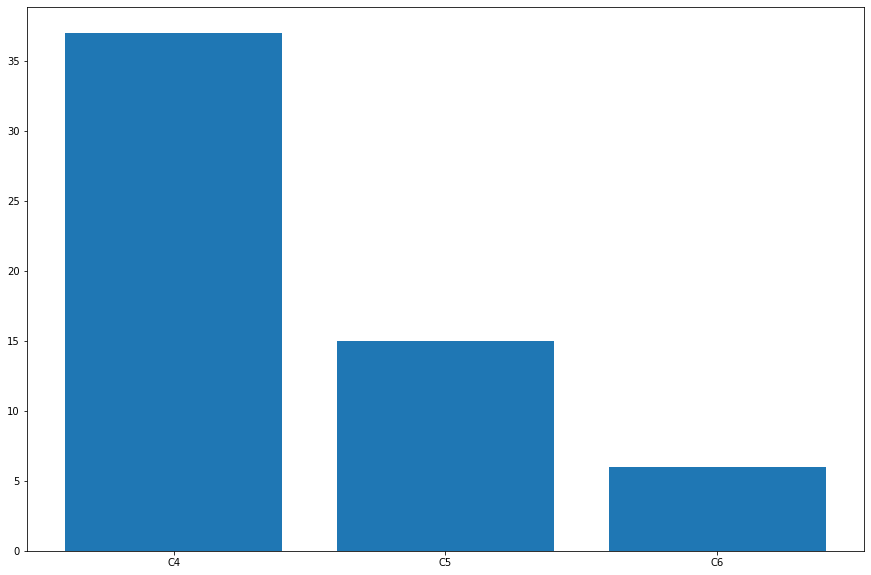

In [12]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\before2.png")
plt.show()

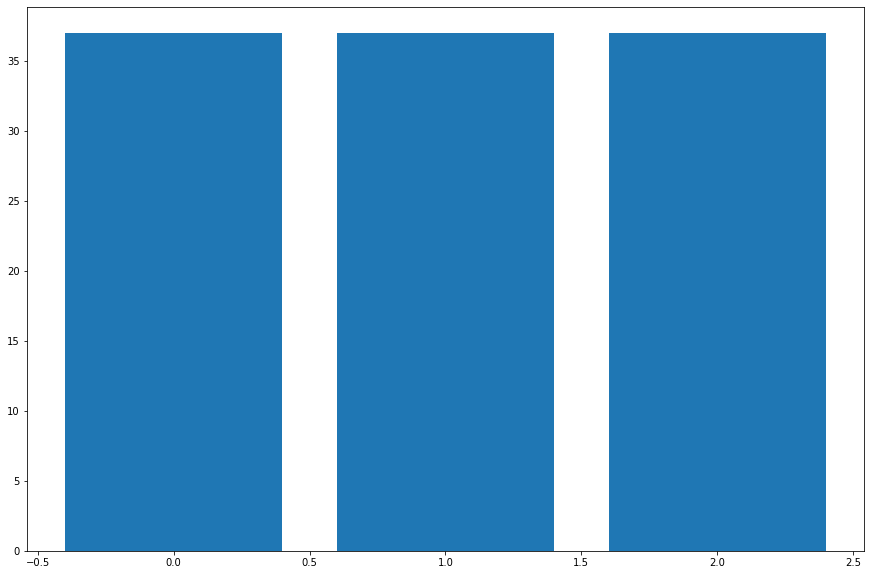

In [13]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns
w = collections.Counter(y_over)
plt.figure(figsize=(15,10))
plt.bar(w.keys(), w.values())
plt.savefig(r"C:\Users\DELL\Documents\Active Folder\COOLYAH\SMT 8\TA\source code\after2.png")
plt.show()

In [14]:
#xtrain, xtest, ytrain, ytest = train_test_split(x_over, y_over, test_size = 0.3)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [0 1 2 3 4 5]


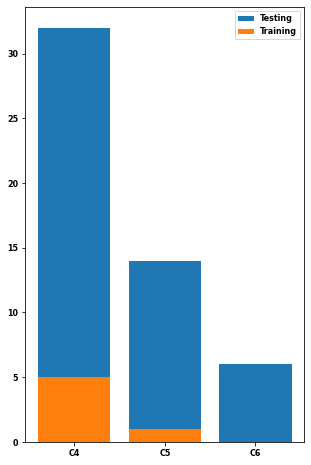

TRAIN: [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [ 6  7  8  9 10 11]


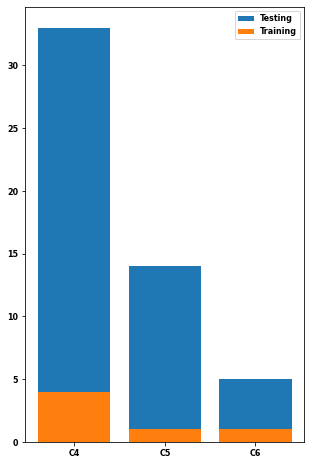

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [12 13 14 15 16 17]


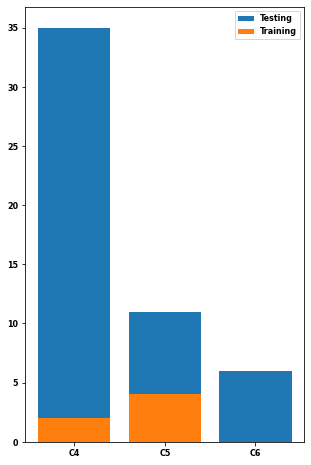

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [18 19 20 21 22 23]


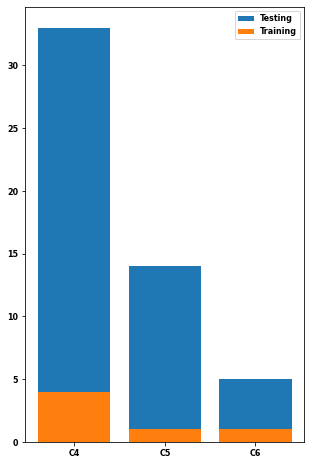

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [24 25 26 27 28 29]


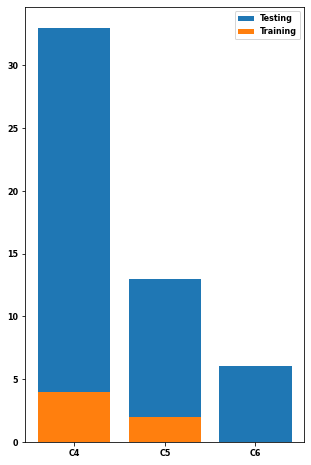

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [30 31 32 33 34 35]


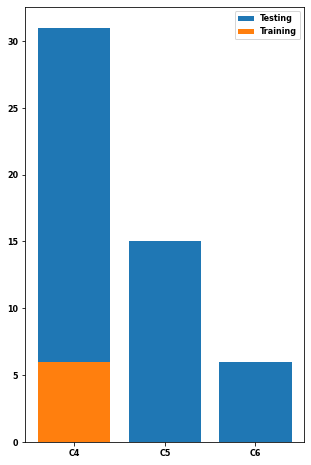

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57] TEST: [36 37 38 39 40 41]


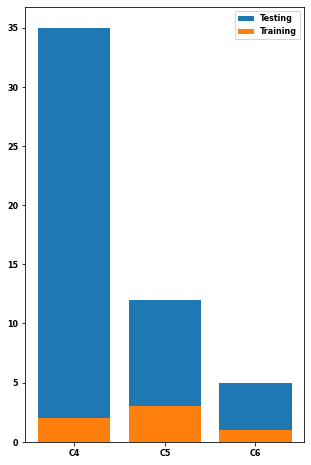

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 48 49 50 51 52 53
 54 55 56 57] TEST: [42 43 44 45 46 47]


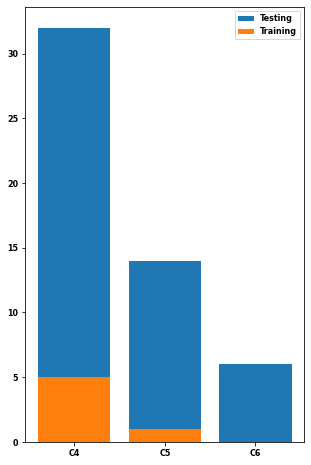

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 53 54 55 56 57] TEST: [48 49 50 51 52]


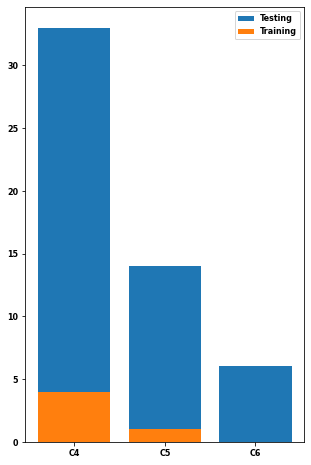

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52] TEST: [53 54 55 56 57]


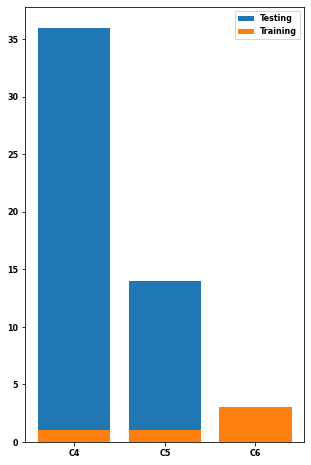

In [15]:
#sebelum smote
import numpy as np
from sklearn.model_selection import KFold
X = x_tf
y = y_le
kf = KFold(n_splits=10)
kf.get_n_splits(X)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}
print(kf)
KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     print("TRAIN:", train_index, "TEST:", test_index)
     plt.rc('font', **font)
     w = collections.Counter(y_train)
     z = collections.Counter(y_test)
     plt.figure(figsize=(5,8))
     plt.bar(w.keys(), w.values())
     plt.bar(z.keys(), z.values())
     plt.xticks([1, 0, 2], ['C5', 'C4', 'C6'])
     plt.legend(['Testing', 'Training'], loc='upper right')
     plt.show()

In [16]:
pipeline_sgd = Pipeline([  
    ('tfidf', TfidfTransformer()),  
    ('classifier', SGDClassifier()),  
])

In [17]:
pipeline_sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()), ('classifier', SGDClassifier())])

In [18]:
prediction_sgd = pipeline_sgd.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, prediction_sgd)))

Model accuracy score: 0.2000


KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11]


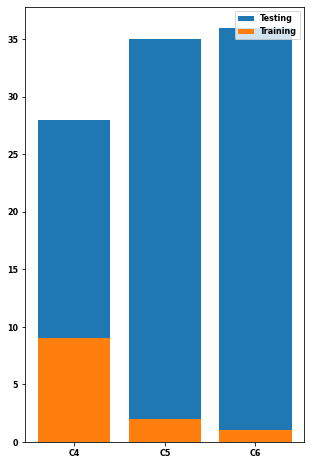

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [12 13 14 15 16 17 18 19 20 21 22]


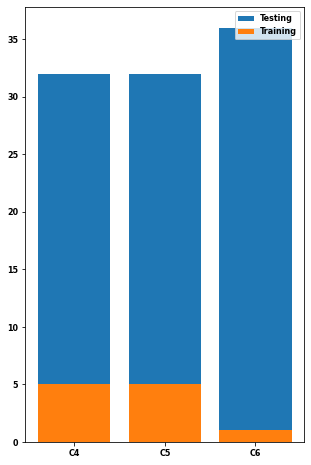

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [23 24 25 26 27 28 29 30 31 32 33]


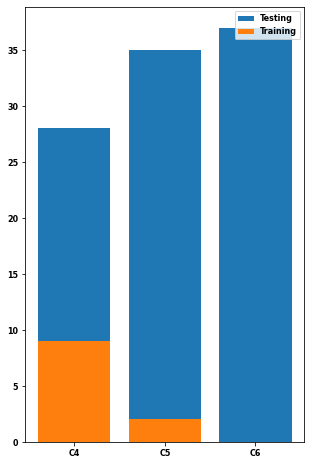

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [34 35 36 37 38 39 40 41 42 43 44]


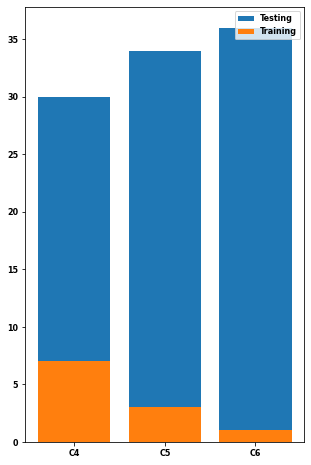

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [45 46 47 48 49 50 51 52 53 54 55]


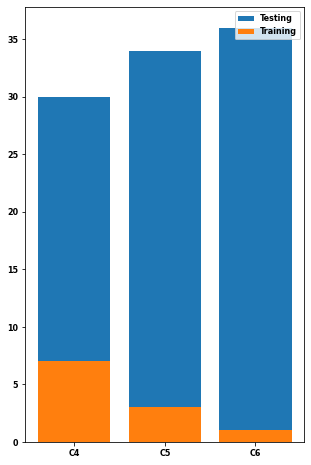

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [56 57 58 59 60 61 62 63 64 65 66]


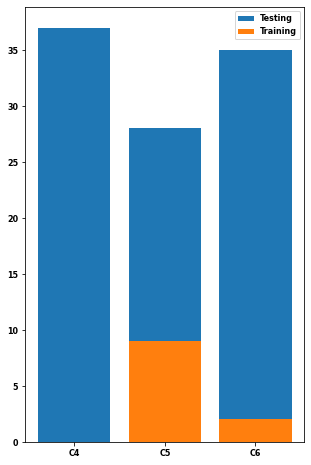

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [67 68 69 70 71 72 73 74 75 76 77]


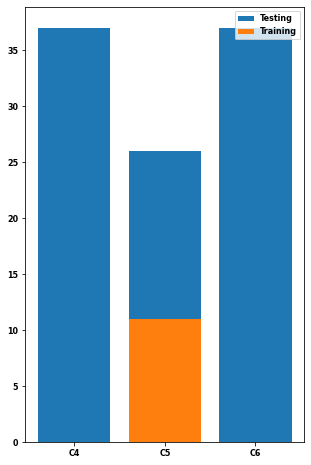

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110] TEST: [78 79 80 81 82 83 84 85 86 87 88]


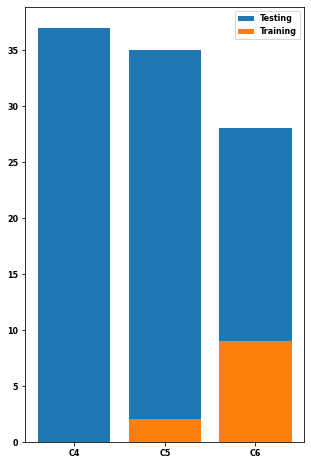

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88 100
 101 102 103 104 105 106 107 108 109 110] TEST: [89 90 91 92 93 94 95 96 97 98 99]


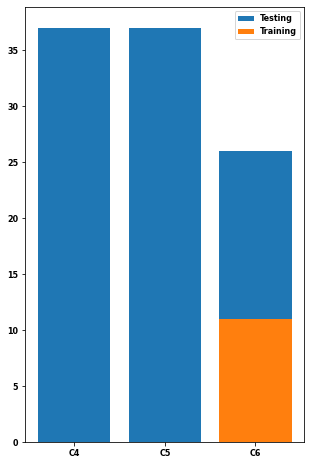

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110]


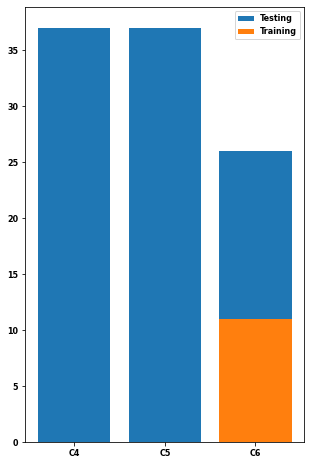

In [20]:
#setelah smote
import numpy as np
from sklearn.model_selection import KFold
X = x_over
y = y_over
kf = KFold(n_splits=10) #k=2 utk testing dan training
kf.get_n_splits(X)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}
print(kf)
KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
     X_train_smote, X_test_smote = X[train_index], X[test_index]
     y_train_smote, y_test_smote = y[train_index], y[test_index]
     print("TRAIN:", train_index, "TEST:", test_index)
     plt.rc('font', **font)
     w = collections.Counter(y_train_smote)
     z = collections.Counter(y_test_smote)
     plt.figure(figsize=(5,8))
     plt.bar(w.keys(), w.values())
     plt.bar(z.keys(), z.values())
     plt.xticks([1, 0, 2], ['C5', 'C4', 'C6'])
     plt.legend(['Testing', 'Training'], loc='upper right')
     plt.show()